# <span style="color:red"> Numerical Simulation 04 </span>

## Exercise 04.1

Starting from the MD code provided, I've added, in the first phase of the simulation, the possibility to start from an old configuration of particles. This possibility is regualted by a boolean type vaiable, and it's input file (redo.dat). If the variable is false the program starts from "config.0", in the other case it copies the datas from config.final and old.final in config.0 and old.0 (in this way it's always possible to check the starting configurations at each run), and uses them to calculate velocities. With these I calculate the temperature  $T(t+dt/2)$, and rescale the velocities of a factor $\sqrt{T^\star/T(t+dt/2)}$, where $T^\star$ is the desired temperature. With these new rescaled velocities I calculate the new spatial configuration from wihch the simulation starts.

For this run of the simulation I've used tha parameters of the fluid ( $T=1.9$, $\rho=0.8$, $r_c=2.5$), with starting configuration of fcc (used only in the first round), to run a simulation some times and check the equilibration of the system. The simulations were runned with $1000$ steps each, taking a measure every $10$ steps, with $\delta t=0.0005$, and $108$ particles. So from time $t=0$ to $t=0.5$ we are in the fist simulation, from $t=0.54$ to $t=1$ we are in the second simulation, and so on. I had to run the simulation at least than $3$ times to have a satisfying equilibration. In the plot you can see that from the $4th$ simulation on, the paramethers of interest fluctuate around the values we have given in input, and that's what we need. In the plot you can see I've tried some simulations more, just to check if the values were stable. The results are shown in Lennard-Jones units.

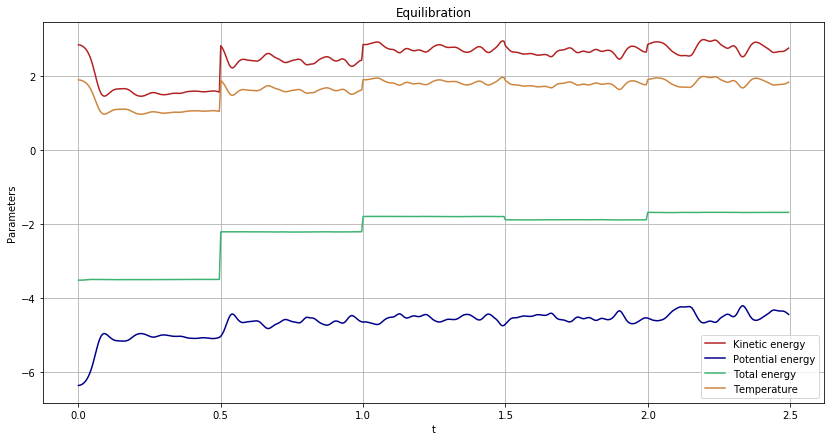

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(500)
x*=10
x=np.ndarray.astype(x, dtype=float)
x*=0.0005

Ekin=np.loadtxt("output_ek.dat")
Epot=np.loadtxt("output_ep.dat")
Etot=np.loadtxt("output_et.dat")
Temp=np.loadtxt("output_t.dat")

fig=plt.figure(figsize=(14,7))
plt.plot(x, Ekin, color="firebrick", label="Kinetic energy")
plt.plot(x, Epot, color="darkblue", label="Potential energy")
plt.plot(x, Etot, color="mediumseagreen", label="Total energy")
plt.plot(x, Temp, color="peru", label="Temperature")

plt.xlabel('t')
plt.ylabel('Parameters')
plt.title("Equilibration")
plt.legend()
plt.grid(True)

## Exercise 04.2

In this exercise I've added the possibility to print average quantities, with their errors, instead of instataneous values. I've used the same parameters of the exercise before, but I've used $n_{step}=10^5$, that means $M=10^4$ measures (I make a measure every $10$ steps), that I've divided in $N=100$ blocks. In each block I made an estimation of each paramenter of interest using $M/N$ measures, and at the end of each block I caclulate an estimation of the mean and error and plotted them in function of the number of blocks. This blocking method was implemented modifiyng the class I've used for the previous exercises to make in work runtime, so at the end of each block it prints out the values. Before doing the simulation that I've plotted, I've runned it for equilibration $3$ times with $n_{step}=10^4$.The results are shown in Lennard-Jones units.

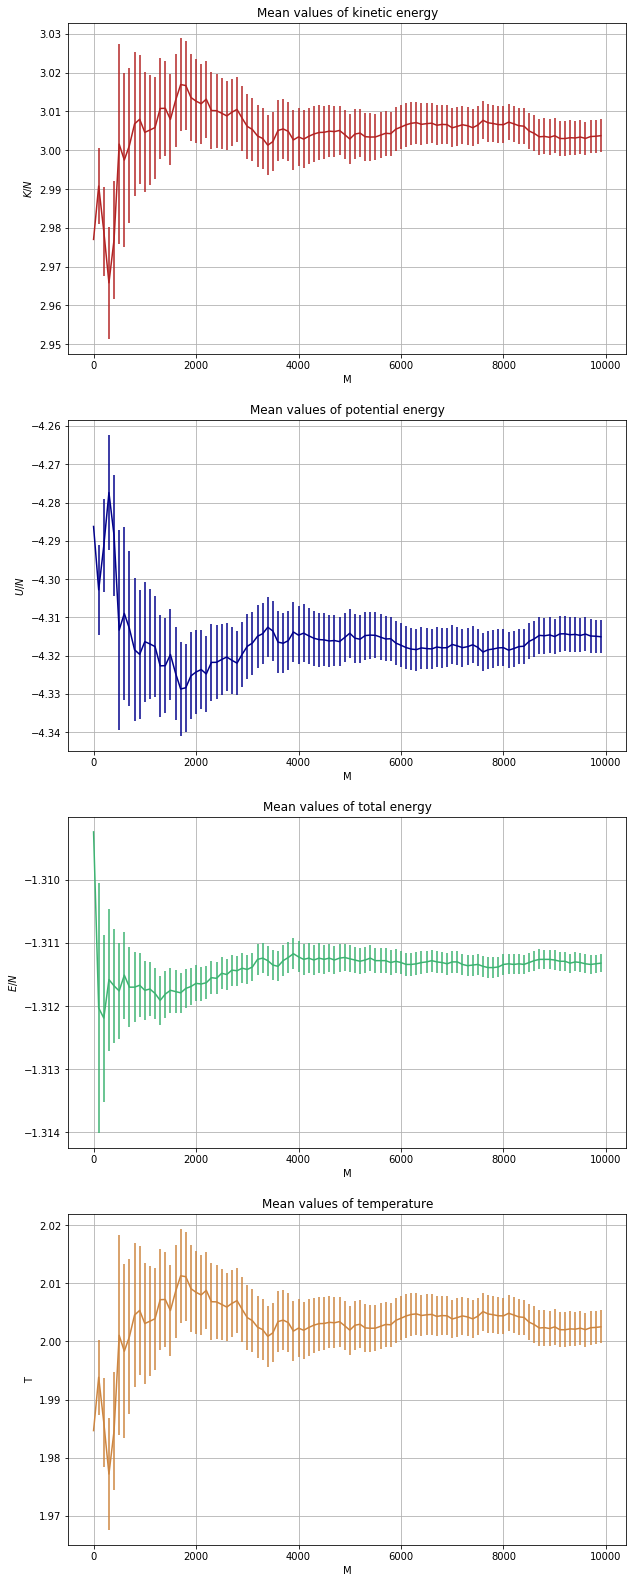

In [3]:
x = np.arange(100)
x*=100

Ekin, errKin =np.loadtxt("ave_ek.out", unpack=True)
Epot, errPot =np.loadtxt("ave_ep.out", unpack=True)
Etot, errTot =np.loadtxt("ave_et.out", unpack=True)
Temp, errTemp =np.loadtxt("ave_t.out", unpack=True)

fig=plt.figure(figsize=(10,28))

plt.subplot(411)
plt.errorbar(x, Ekin, yerr=errKin, color="firebrick")
plt.xlabel('M')
plt.ylabel('$K/N$')
plt.title("Mean values of kinetic energy")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot, yerr=errPot, color="darkblue")
plt.xlabel('M')
plt.ylabel('$U/N$')
plt.title("Mean values of potential energy")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot, yerr=errTot, color="mediumseagreen", label="Total energy")
plt.xlabel('M')
plt.ylabel('$E/N$')
plt.title("Mean values of total energy")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp, yerr=errTemp, color="peru", label="Temperature")
plt.xlabel('M')
plt.ylabel('T')
plt.title("Mean values of temperature")
plt.grid(True)

## Exercise 04.3

For this exercise I've used the same code of the exercise before, changing the initial parameters to simulate a solid phase, a liquid one and a gas one. For each phase I've done an equilibration before taking the measures I've plotted. The equilibration consisted in running the simulation $4$ times with a minor number of steps ($N_{steps}=10^4$). After this, the simulation was run with $n_{steps}=10^5$, divided in $N=100$ blocks.

To show the results in units of the International System we have to know which element we are simulating, in this case it was Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu). To convert from Lennard-Jones units to SI unit I've used the following rules:
- time: $t=t_{LJ}\space \sigma\sqrt{\frac{m}{\epsilon}}$
- temperature: $T=T_{LJ} \space \frac{\epsilon}{k_B}$
- potential energy: $U=U_{LJ}\space \epsilon$ (same for all the other energies)


**Solid phase**

$\rho^\star = 1.1$, $T^\star = 0.8$, cut-off radius: $r_c = 2.2$

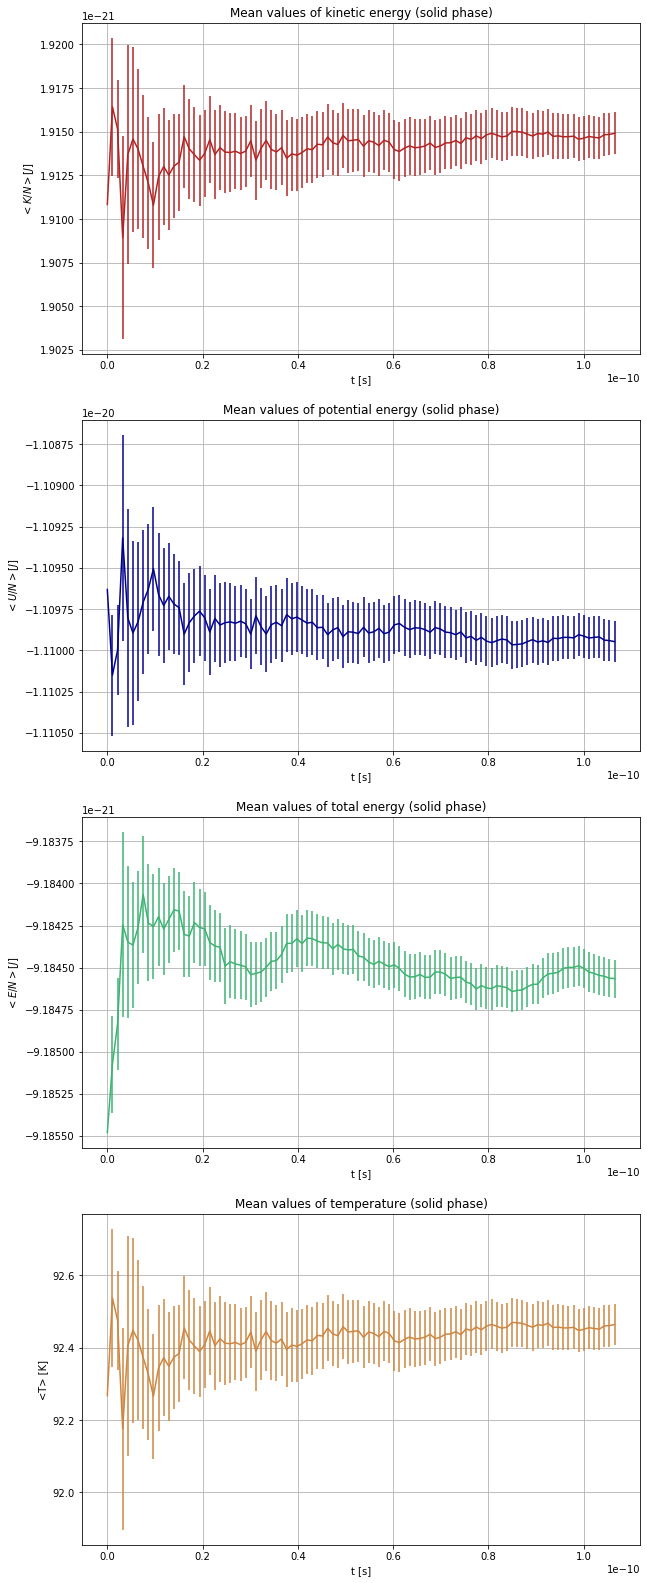

In [10]:
epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=1000*0.0005*sigma*np.sqrt(m/eps)

Ekin, errKin =np.loadtxt("ave_EkinS.out", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotS.out", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotS.out", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempS.out", unpack=True)

fig=plt.figure(figsize=(10,28))

plt.subplot(411)
plt.errorbar(x, Ekin*eps, yerr=errKin*eps, color="firebrick")
plt.xlabel('t [s]')
plt.ylabel('$<K/N> [J]$')
plt.title("Mean values of kinetic energy (solid phase)")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('t [s]')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (solid phase)")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot*eps, yerr=errTot*eps, color="mediumseagreen", label="Total energy")
plt.xlabel('t [s]')
plt.ylabel('$<E/N> [J]$')
plt.title("Mean values of total energy (solid phase)")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp*epskb, yerr=errTemp*epskb, color="peru", label="Temperature")
plt.xlabel('t [s]')
plt.ylabel('<T> [K]')
plt.title("Mean values of temperature (solid phase)")
plt.grid(True)

**Liquid phase**

$\rho^\star = 0.8$, $T^\star = 1.1$, cut-off radius: $r_c = 2.5$

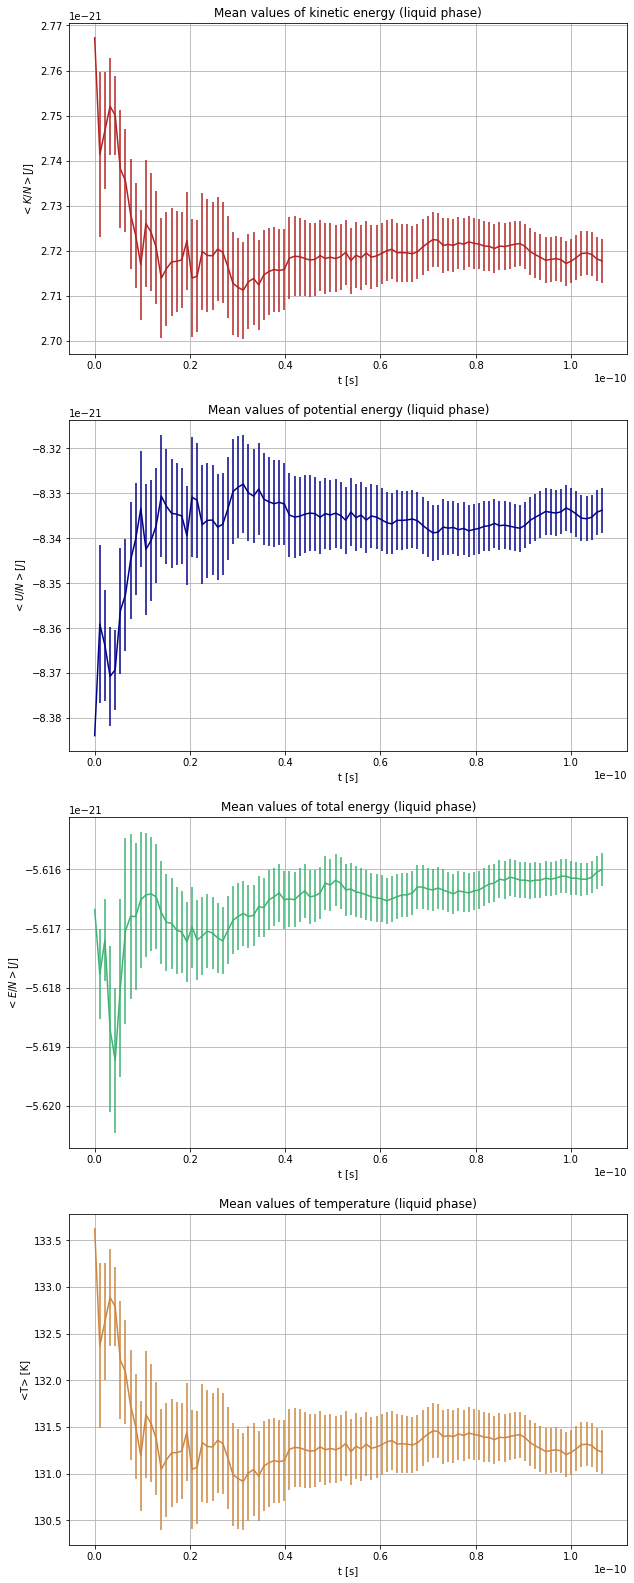

In [5]:
Ekin, errKin =np.loadtxt("ave_EkinL.out", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotL.out", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotL.out", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempL.out", unpack=True)

fig=plt.figure(figsize=(10,28))

plt.subplot(411)
plt.errorbar(x, Ekin*eps, yerr=errKin*eps, color="firebrick")
plt.xlabel('t [s]')
plt.ylabel('$<K/N> [J]$')
plt.title("Mean values of kinetic energy (liquid phase)")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('t [s]')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (liquid phase)")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot*eps, yerr=errTot*eps, color="mediumseagreen", label="Total energy")
plt.xlabel('t [s]')
plt.ylabel('$<E/N> [J]$')
plt.title("Mean values of total energy (liquid phase)")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp*epskb, yerr=errTemp*epskb, color="peru", label="Temperature")
plt.xlabel('t [s]')
plt.ylabel('<T> [K]')
plt.title("Mean values of temperature (liquid phase)")
plt.grid(True)

**Gas phase**

$\rho^\star = 0.05$, $T^\star = 1.2$, cut-off radius: $r_c = 5.0$

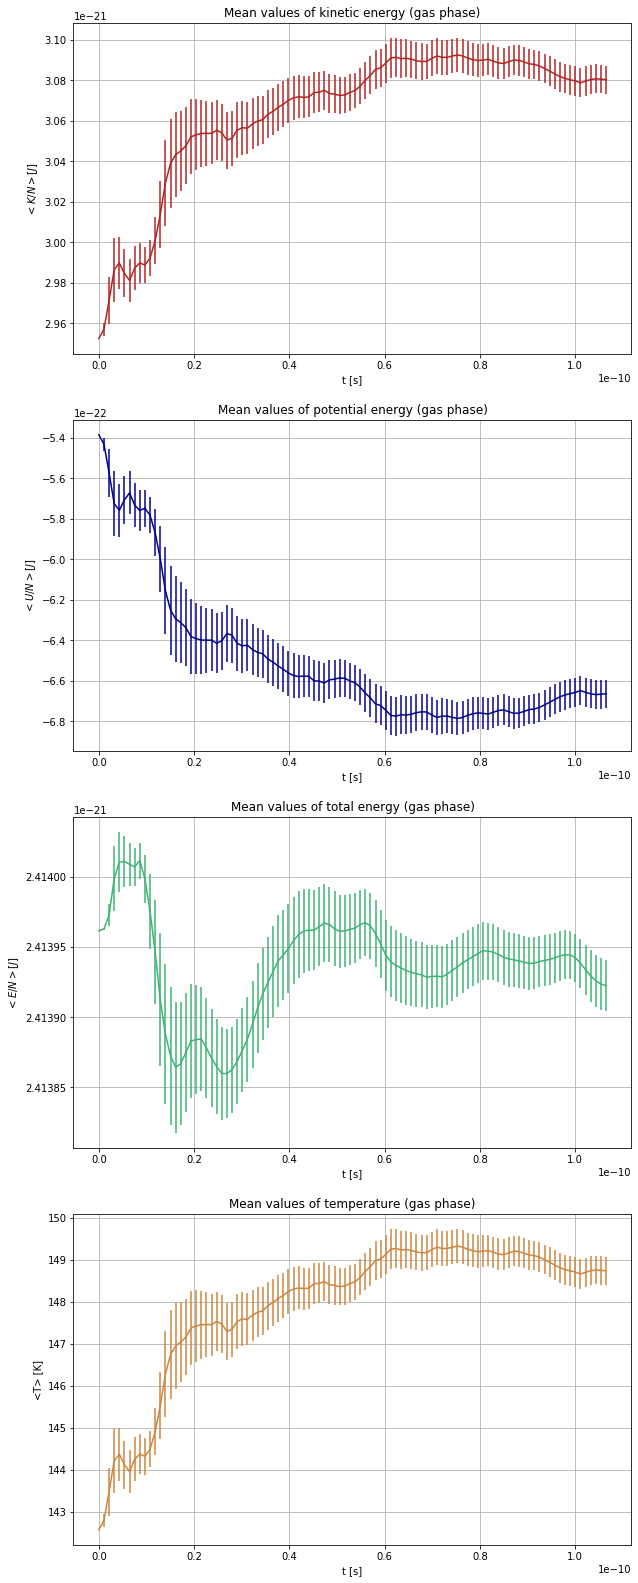

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=1000*0.0005*sigma*np.sqrt(m/eps)

Ekin, errKin =np.loadtxt("ave_EkinG.out", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotG.out", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotG.out", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempG.out", unpack=True)

fig=plt.figure(figsize=(10,28))

plt.subplot(411)
plt.errorbar(x, Ekin*eps, yerr=errKin*eps, color="firebrick")
plt.xlabel('t [s]')
plt.ylabel('$<K/N> [J]$')
plt.title("Mean values of kinetic energy (gas phase)")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('t [s]')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (gas phase)")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot*eps, yerr=errTot*eps, color="mediumseagreen", label="Total energy")
plt.xlabel('t [s]')
plt.ylabel('$<E/N> [J]$')
plt.title("Mean values of total energy (gas phase)")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp*epskb, yerr=errTemp*epskb, color="peru", label="Temperature")
plt.xlabel('t [s]')
plt.ylabel('<T> [K]')
plt.title("Mean values of temperature (gas phase)")
plt.grid(True)